In [202]:
import numpy as np
import pandas as pd

In [203]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [204]:
print(train.shape, test.shape)

(142404, 29) (142403, 29)


In [205]:
y_train = train['Class']
X_train = train.drop('Class', axis=1)

y_test = test['Class']
X_test = test.drop('Class', axis=1)

## Questão 1 (valor 2 pontos)
- a) Baseado na base de dados fornecida, qual das duas métricas de avaliação
deve ser usada para medir os resultados dos modelos: Acurácia ou AUC?

- b) Na base fornecida, qual seria o resultado esperado de: um modelo aleatório,
um modelo que diz que tudo é fraude e um modelo que diz que nada é
fraude, para cada uma das duas métricas (Acurácia e AUC)? Discuta os
resultados.

In [206]:
values, distr = np.unique(y_train, return_counts=True)
print("Distribuicao das classes: ")
print(f"[{values[0]}]: {distr[0]} \t-> {distr[0] / np.sum(distr) * 100:.2f}%")
print(f"[{values[1]}]: {distr[1]} \t-> {distr[1] / np.sum(distr) * 100:.2f}%")

Distribuicao das classes: 
[0]: 142135 	-> 99.81%
[1]: 269 	-> 0.19%


Como a base de dados fornecida é completamente desproporcional, a metrica ideal é a AUC. Se fossemos considerar a acurácia, seria possivel admitir que todos resultados sendo da classe ['0'] que o modelo teria uma acurácia de 0.998, aparentando ser uma ótima pontuação, mas não encontra nenhum resultado da classe ['1'] que é o mais importante a se detectar no nosso caso, por se tratar de fraudes.

Ja com o modelo da AUC, leva em consideração a proporção de falsos positivos e verdadeiros positivos. Por exemplo se um modelo admitir que tudo seria de um classe e errasse todas demais, teriamos uma AUC de 0.5, que é o pior dos casos e independentemente da taxa de sucesso.

In [207]:
from sklearn import datasets, metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train)

In [208]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def roc_curve(y_real, y_predict):
    fpr, tpr, _ = metrics.roc_curve(y_real, y_predict)
    auc_score = roc_auc_score(y_real, y_predict)

    plt.plot(fpr, tpr, label=f"Pontuação AUC: {auc_score}")
    plt.xlabel("Taxa de falso positivo")
    plt.ylabel("Taxa de verdadeiro positivo")
    plt.legend()

    

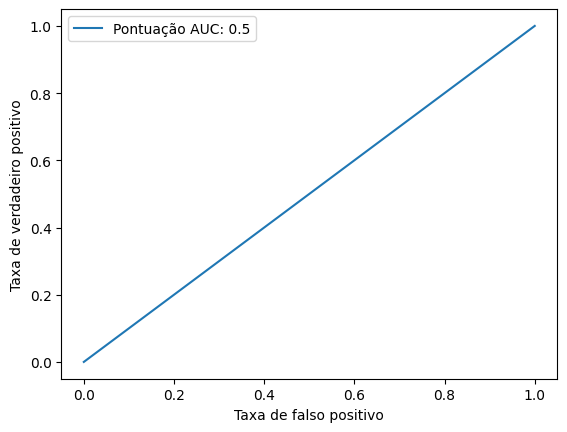

In [209]:
roc_curve(y_train, np.ones(len(y_train)))

## Questão 2 (valor 2 pontos) - A total corretude dessa questão depende da primeira questão

Usando a classe MLPClassifier do scikit-learn crie a seguinte arquitetura de rede
neural:
- 5 camadas escondidas, com 20 neurônios em cada camada;
- Função de ativação ReLU para todos os neurônios das camadas escondidas;
- random_state = 42 e
- Os demais parâmetros com o valor padrão da classe MLPClassifier.

Em seguida, treine um modelo para cada um dos valores de alpha (taxa de
regularização L2): [0.0, 0.01, 0.1, 1, 10] e compute o resultado deles na
base de teste (usando a métrica escolhida na questão anterior).

Com base nesses resultados, comente sobre o efeito da taxa de regularização no
resultado do modelo.

In [210]:
from sklearn.neural_network import MLPClassifier

classifiers = []
alphas = [0.0, 0.01, 0.1, 1.0, 10.0]

for alpha in alphas:

    nn = MLPClassifier(
        hidden_layer_sizes=(20,20,20,20,20,),
        random_state=42,
        alpha=alpha
    )
    classifiers.append(nn.fit(X_train, y_train))



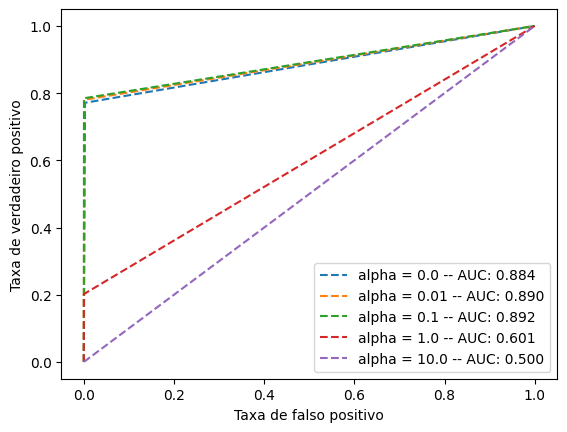

In [211]:
legend = []
for clf in classifiers:
    y_predict = (clf.predict(X_test))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
    auc_score = roc_auc_score(y_test, y_predict)
    legend.append(f"alpha = {clf.alpha} -- AUC: {auc_score:.3f}")
    plt.plot(fpr, tpr, "--")
    plt.xlabel("Taxa de falso positivo")
    plt.ylabel("Taxa de verdadeiro positivo")
plt.legend(legend)

Os parametros de alpha servem para penalizar os pesos das variaveis, prevenindo que ocorra um overfitting. Porém no nosso caso não é necessario este tratamento, logo os valores de alpha mais proximos de zero [0, 0.01 e 0.1] tem os melhores valores, alem de estarem bem proximos.
Em contrapartida os valores de alpha=[1 e 10] tiveram um efeito contrario do proposito do parametro, ocorreu um underfitting por conta das variaveis perderem peso de importancia. 

Com isto no caso de alpha=10 o modelo teve o pior resultado possivel (0.5), mesmo caso de admitir que todos resultados sejam de apenas uma classe.

## Questão 3 (valor 2 pontos) - A total corretude dessa questão depende da primeira questão
Compare os seguintes modelos:
1. Rede neural (MLPClassifier):
    - a) Sem camadas intermediárias;
    - b) Com uma camada intermediária de 10 neurônios e
    - c) Com duas camadas intermediárias, com 5 neurônios cada.

---
2. K-NN (KNeighborsClassifier)
    - a) Com k = 3;
    - b) Com k = 5 e
    - c) Com k = 7.

Todos os demais hiperparâmetros devem ser deixados com os valores padrão do
scikit-learn. Essa comparação deve ser feita usando 3-fold cross-validation nos
dados de treinamento. Por fim, o valor da métrica de sucesso na base de teste só
deve ser computado para o melhor modelo de rede neural e o melhor K-NN. Tal
protocolo deve ser seguido para que tenhamos uma estimativa mais robusta dos
resultados dos modelos.
Com base nesses resultados, responda:

a) Qual técnica obteve o melhor resultado na base de teste?

b) Qual técnica demora mais para gerar as previsões nos dados de teste?
Dicas:
1. Use a classe GridSearchCV do scikit-learn para comparar os
hiperparâmetros e
2. Use o magic command ```%%time``` do Jupyter Notebook para medir os tempos.

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {
    "n_neighbors": [3,5,7]
    }

mlp_params = {
    "hidden_layer_sizes": [[], [10], [5,5]]
}

KNN = KNeighborsClassifier()
MLP = MLPClassifier()

KNN_grid = GridSearchCV(KNN, knn_params, cv=3, scoring='roc_auc')
KNN_grid.fit(X_train, y_train)

MLP_grid = GridSearchCV(MLP, mlp_params, cv=3, scoring='roc_auc')
MLP_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [[], [10], [5, 5]]},
             scoring='roc_auc')

In [213]:
%%time
y_knn = KNN_grid.predict(X_test)

CPU times: total: 6min 32s
Wall time: 40.8 s


In [214]:
%%time
y_mlp = MLP_grid.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 36 ms


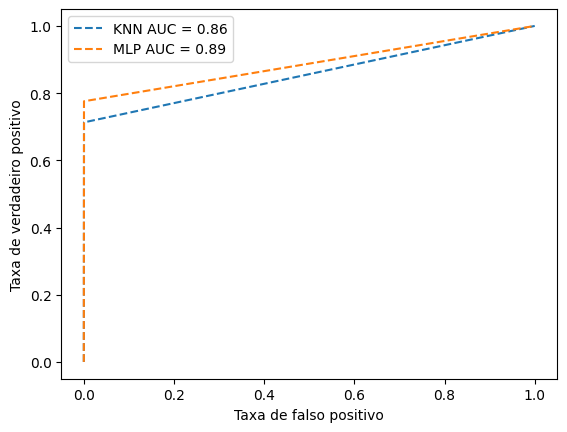

In [215]:
legend = []

plt.xlabel("Taxa de falso positivo")
plt.ylabel("Taxa de verdadeiro positivo")

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_knn)
auc_score_knn = roc_auc_score(y_test, y_knn)
plt.plot(fpr_knn, tpr_knn, "--")

fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test, y_mlp)
auc_score_mlp = roc_auc_score(y_test, y_mlp)
plt.plot(fpr_mlp, tpr_mlp, "--")
    
plt.legend([f'KNN AUC = {auc_score_knn:.2}', f'MLP AUC = {auc_score_mlp:.2}'])

In [216]:
MLP_results = pd.DataFrame(MLP_grid.cv_results_)
MLP_results = MLP_results[['mean_score_time', 'param_hidden_layer_sizes', 'mean_test_score', 'rank_test_score']]
MLP_results.sort_values('rank_test_score')

,mean_score_time,param_hidden_layer_sizes,mean_test_score,rank_test_score
2,0.023670,"[5, 5]",0.949498,1
0,0.013999,[],0.941031,2
1,0.016668,[10],0.938808,3


In [217]:
KNN_results = pd.DataFrame(KNN_grid.cv_results_)
KNN_results = KNN_results[['mean_score_time', 'param_n_neighbors', 'mean_test_score', 'rank_test_score']]
KNN_results.sort_values('rank_test_score')

,mean_score_time,param_n_neighbors,mean_test_score,rank_test_score
2,8.257042,7,0.910671,1
1,8.197379,5,0.892187,2
0,8.288020,3,0.888509,3


No método do KNN o melhor parametro é K = 7
No método da rede neural, o melhor foi 2 camadas com 5 neuronios casa.


A rede neural superior tanto em pontuação quanto em tempo.

## Questão 4 (valor 2 pontos)
Usando o melhor modelo obtido na questão anterior, calcule o lucro que tal
modelo traria no seguinte cenário:

- As top-1% transações com maior chance de fraude (de acordo com os scores
do modelo) seriam impedidas de acontecer;
- Cada fraude evitada em média evita um prejuízo (gera um lucro) de R$ 100 e
- Cada não-fraude bloqueada gera em média um prejuízo de 2 reais.
Comente os resultados.


Para fazer isto, primeiro pegamos a quantidade total de transações do dataset de test. Com isto é possivel determinar a quantidade K de 1% destas transações.

Aplicamos o modelo no array X_test para gerar y_prob que é um array de probabilidades para ser fraude ou não. Ordenamos y_prob para quanto acessarmos o indice K, será possivel determinar a probabilidade que sera o corte, ou seja, acima dela todas serão impedidas e todas abaixo serão permitidas.

In [218]:
total = len(X_test)
selected = int(total*0.01)

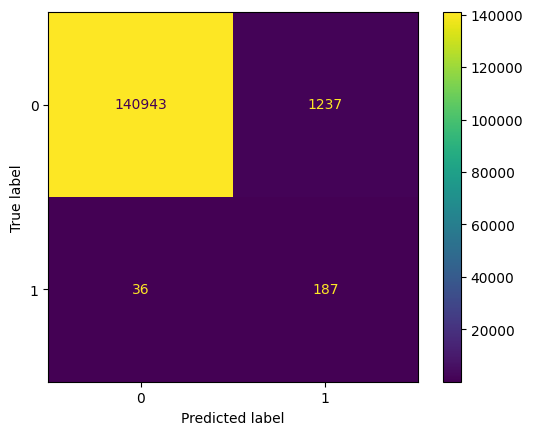

In [219]:
from sklearn.metrics import ConfusionMatrixDisplay

y_prob = MLP_grid.predict_proba(X_test)[:, 1]
y_prob_s = sorted(y_prob, reverse=True)

corte = y_prob_s[selected]
y_bin = np.int64(y_prob > corte)

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_bin,
)

In [220]:
nao_fraudes_bloqueadas = np.count_nonzero(np.logical_and(y_bin==1, y_test==0))
fraudes_impedidas = np.count_nonzero(np.logical_and(y_bin==1, y_test==1))

lucro = 100 * fraudes_impedidas - 2 * nao_fraudes_bloqueadas

print(f"Quantidade de fraudes impedidas: {fraudes_impedidas}")
print(f"Quantidade de transacoes normais que foram bloqueadas: {nao_fraudes_bloqueadas}\n")

print(f"Lucro total: R${lucro}.00")


Quantidade de fraudes impedidas: 187
Quantidade de transacoes normais que foram bloqueadas: 1237

Lucro total: R$16226.00


## Questão 5 (valor 2 pontos)

Use uma rede neural sem camadas intermediárias e com um neurônio de saída
para encontrar variáveis não importantes para o problema estudado. Indique
porque tais variáveis não são importantes.

Dica: use a classe SGDClassifier(loss='log', random_state=42) para criar
uma rede com um só neurônio de saída que usa a função de ativação sigmoid.
Modifique os outros hiperparâmetros conforme necessário.

Uma rede neural sem camadas intermediarias dependem dos dados de input e do ultimo neuronio (que será o output), da seguinte format


$$sigmoid(\sum^n_{i=0}I_i * W_i + B)$$

Sendo:
n: Quantidade de inputs

$I_i$: Input de indice $i$

$W_i$: Peso relacionado ao $I_i$

B: Bias, constante

Essa função mostra que os valores de inputs tem sua importancia definida com base em um peso que é relacionado, de forma que quanto mais proximo de 0 é este peso, menor será sua importancia.
Vale lembrar que é possivel terem pesos negativos, sendo assim para criar um rank de importancia, é preciso pegar os pesos em módulo.

In [221]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42)
SGD.fit(X_train, y_train)


SGDClassifier(random_state=42)

Checando quais variaveis são mais importante e fazendo um rank delas.

Para isso pegamos os pesos do modelo treinado em SGD.coef_[0], que possui o mesmo shape e é ordenado conforme os inputs.

em rank terá valores de 1 até n+1, de forma que os indices das variaveis recebam a ordem do rank adequada, de acordo com o valor do peso em modulo ordenado do maior para o menor.

Ex.

Variaveis   = [A1, A2, A3, A4]

Pesos       = [20, 40, 10, 5]

rank        = [2, 1, 3, 4]

In [222]:
pesos = SGD.coef_[0]

rank = list(map(lambda x: sorted(np.abs(pesos), reverse=True).index(x) + 1, np.abs(pesos)))
info = {
    'Pesos': pesos,
    'Variaveis': SGD.feature_names_in_,
    'Ranking': rank
}
coef = pd.DataFrame(data=info).sort_values('Ranking')
coef

,Pesos,Variaveis,Ranking
13,-17.239786,V14,1
3,12.991462,V4,2
9,-7.195617,V10,3
11,-6.212125,V12,4
10,5.944628,V11,5
7,-4.338421,V8,6
12,-3.954303,V13,7
8,-3.811237,V9,8
0,-3.531226,V1,9
14,3.102167,V15,10
